# Project - Finding Donors

## Background
**In this project, I used several supervised algorithms to model individual's income using data collected from the 1994 U.S. census (The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). My goal was to construct a model that accurately predicts whether someone makes more than $50K. This kind of task can help some organizations, e.g., church or charity group, to identify potential donors. 
**

In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
# Import supplementary visualization code visuals.py
import visuals as vs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Pretty display for notebooks
%matplotlib inline

In [2]:
data=pd.read_csv('census.csv')

In [3]:
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

# Feature inspection

### Function to split columns in the df into numerical_columns list and categorical_columns list

In [5]:
def column_inspections(data):
    numerical_columns=[]
    categorical_columns=[]
    for i in data.columns:
        if 'int' in str(data[i].dtypes) or 'float' in str(data[i].dtypes):
            numerical_columns.append(i)
        else:
            categorical_columns.append(i)
        
    return numerical_columns,categorical_columns

In [6]:
numerical_columns,categorical_columns = column_inspections(data)
for i in categorical_columns:
    print('\n unique values for columns {}: \n{}'.format(i, data[i].unique()))


 unique values for columns workclass: 
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']

 unique values for columns education_level: 
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']

 unique values for columns marital-status: 
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

 unique values for columns occupation: 
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']

 unique values for columns relationship: 
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

 unique values for columns race: 

## Feature Summaries


- Features: 
    - Categorical values: 
        - workclass: (' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov' ' Self-emp-inc' ' Without-pay')
        - education_level (' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college' ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school' ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th')

        - marital-status(' Never-married' ' Married-civ-spouse' ' Divorced' ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed')

        - occupation (' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty' ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
     ' Armed-Forces' ' Priv-house-serv')

        - relationship(' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
     ' Other-relative')

        - race (' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other')

        - sex (' Male' ' Female')

        - native-country (' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
     ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
     ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos' ' Taiwan'
     ' Haiti' ' Portugal' ' Dominican-Republic' ' El-Salvador' ' France'
     ' Guatemala' ' Italy' ' China' ' South' ' Japan' ' Yugoslavia' ' Peru'
     ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago' ' Greece'
     ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
     ' Holand-Netherlands')


    - Numeric values: 
        - age (int64)
        - education-num (float64)
        - capital-gain (float64)
        - capital-loss (float64)
        - hours-per-week (float64)


- Dependent variable: 
    - income (object) ('<=50K' or '>50K')



## Examine the distribution of numerical values

### Missing values, skewed distribution?

In [7]:
#numeric columns
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# categorical values
for i in categorical_columns:
    print(i, data[i].count())

workclass 45222
education_level 45222
marital-status 45222
occupation 45222
relationship 45222
race 45222
sex 45222
native-country 45222
income 45222


- **No missing values in numerical or categorical columns as every column has the same count, 45222.**
- **It seems that capital-gain and capital-loss are very skewed from the describe table.**

**No need to fill in missing values but need to take a look at the distribution of numerical values.**

### Function to examine distribution 
**Input 
- df[numerical_columns]
- transformed or not 
- y_limit if needed
**plot histogram**

In [9]:
def distribution(data, transformed=False,y_limit=False):
    column_list=data.columns
    fig=plt.figure(figsize=(11,6))
    row=(len(column_list)//3)+1
    
    for i,feature in enumerate(column_list):
        ax=fig.add_subplot(row,3,i+1)
        ax.hist(data[feature],bins=25)
        ax.set_title('{} Distribution'.format(feature),fontsize=14)
        ax.set_xlabel('Value')
        ax.set_ylabel('Number of Records')
        if y_limit:
            ax.set_ylim(top=y_limit)
    if transformed:
        fig.suptitle('Log-transformed Distributions of Features',fontsize=16,y=1.03)
    else:
        fig.suptitle('Distribution of Features',fontsize=16,y=1.03)
    fig.tight_layout()
    fig.show()
        

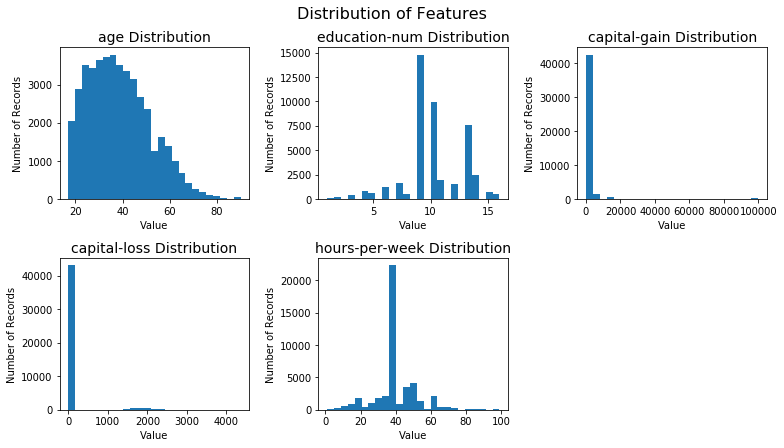

In [10]:
#plot distribution for features with numerica values
distribution(data[numerical_columns])

** Well, capital-gain and capital-loss are very skewed with the majority with a value centering around 0. The skewed distributions of these two features make sense as most people do not make money from investments. Let's take a closer look of these two features with a smaller y_axis.**

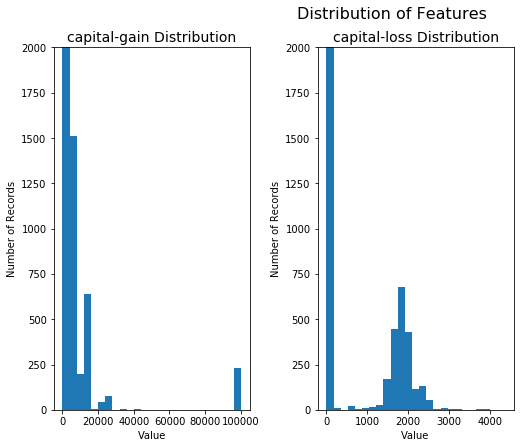

In [11]:
distribution(data[['capital-gain','capital-loss']],y_limit=2000)

**Yes, the distributions of capital-gain and capital-loss are heavily skewed with lots of samples centering around the value 0. **

# Preprocessing data

** Features:**

- capital-gain and capital-loss are highly-skewed 
    1. Log transformation
    2. Scale
- Other numeric features
    1. Scale
- Categorical features
    1. encode

** Dependent value (y):**
- convert '<=50K' into 0 and '>50K' into 1


In [12]:
# split features and the target value
income_raw=data['income']
feature_raw=data.drop('income',axis=1)

In [13]:
# log transformation of capital-gain and capital-loss
skewed=['capital-gain','capital-loss']
features_log_transformed=feature_raw.copy()
features_log_transformed[skewed]=feature_raw[skewed].apply(lambda x: np.log(x + 1))

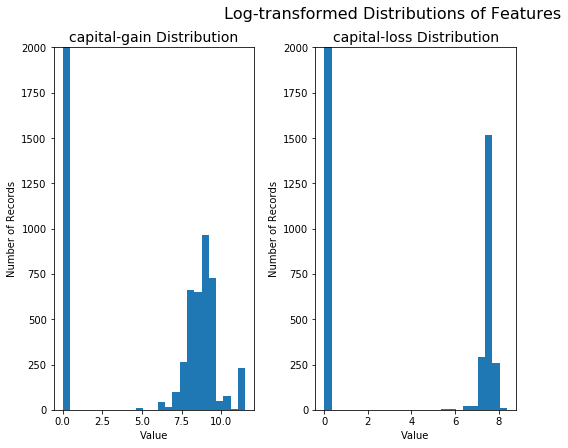

In [14]:
# visualize the log transformation
distribution(features_log_transformed[skewed],transformed=True,y_limit=2000)


** Distributions of capital-gain and capital-loss look much better after log transformation. **

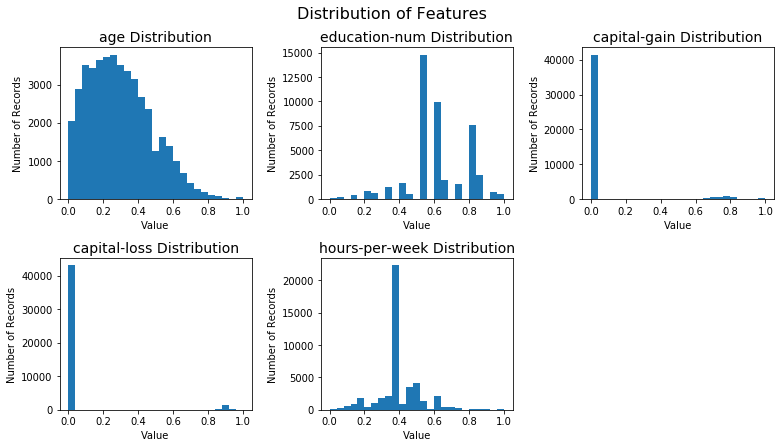

In [15]:
# scale all the numeric values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_log_minmax_transformed=features_log_transformed.copy()
features_log_minmax_transformed[numerical_columns]=scaler.fit_transform(features_log_transformed[numerical_columns])

#visualize to see if the xaxis has changed into 0-1
distribution(features_log_minmax_transformed[numerical_columns])


**Ok, every numerical column has been scaled from 0 to 1**

In [16]:
# encode categorical values
features_final=pd.get_dummies(features_log_minmax_transformed)

print('# of features after encoding are {}'.format(len(features_final.columns)))

# of features after encoding are 103


In [17]:
#convert the <=50K  and >50K in the income_raw into 0 and 1
income=income_raw.replace({'<=50K':0,'>50K':1})
income.value_counts()

0    34014
1    11208
Name: income, dtype: int64

** Alright, we have transformed, scaled and encoded our data. **

** Now we need to use the features_final as X and income as y. **

## Split and shuffle data

In [18]:
from sklearn.model_selection import train_test_split

#assign 80% of data for training while 20% for testing
X_train,X_test,y_train,y_test=train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
#confirm splitting is good
print('X_train has {} rows and {} features'.format(X_train.shape[0],X_train.shape[1]))
print('X_test has {} rows and {} features'.format(X_test.shape[0],X_test.shape[1]))


X_train has 36177 rows and 103 features
X_test has 9045 rows and 103 features


## Metrics and the worst predictor 

- **Metrics**
    -  accuracy_score
    -  fbeta_score while beta=0.5. 
        - Here I think we should emphasize on the precision as this organization really does not want to mis-identify people with an income less than 50K as potential donors.  


**The worst predictor**
- **I do not have any number to improve on. So my benchmarker is the worst model that we assume everyone makes more than 50K.**

In [19]:
# assuming everyone has an income of 1 so all FP, TP 
FP,TP=income.value_counts()

# no negatives in this model
FN=0
TN=0

accuracy=(TP+TN)/(TP+FP+FN+TN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# Calculate F-score for beta = 0.5 
fscore = (1+0.5*0.5)*(precision*recall)/((0.5*0.5*precision)+recall)

# Print the results 
print("The worst predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))


The worst predictor: [Accuracy score: 0.2478, F-score: 0.2917]


**My model needs to do better, hopefully, way better than the worst predictor.**

# Model Selections

### Function to fit and predict learners

- input 
    - learner: the learning algorithm to be trained and predicted on
    - sample_size: the size of samples (number) to be drawn from training set 
      (to evaluate performance when trained by various number of samples)
    - X_train
    - y_train
    - X_test
    - y_test
    
- output
    -dictionary with structure as this
      {'acc_test':  accuracy score for the testing set using this learner,
      'acc_train': accuracy score for the first 300 samples in the training set (set 300 becuase some learner takes too long to predict the entire training set),
      'f_test': fscore (beta=0.5) for the testing set using this learner,
      'f_train': fscore(beta=0.5) for the first 300 samples in the training set,
      'pred_time': time takes for predicting the 300 samples from the training set and the testing set,
      'train_time': time takes for training samples}


In [20]:
from sklearn.metrics import fbeta_score, accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    results = {}
    
    #Fit the model and calculate the time
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size]) #fit the model with given sample size
    end = time() # Get end time 
    # Calculate the training time
    results['train_time'] = end-start
        
    #Predict the model and get the time
    start = time() # Get start time
    predictions_test = learner.predict(X_test) #predict test samples
    predictions_train = learner.predict(X_train[:300]) #predict the first 300 samples
    end = time() # Get end time
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # calculate the accuracy of the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # calculate the accuracy of the test samples
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # calculate the fbeta_score (beta=0.5) of the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
#     print('f_train score is {}'.format(results['f_train']))
        
    # calculate the fbeta_score (beta=0.5) of the test samples
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    # print done
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Function to plot performances of all learners in a bar plot

**input**
    -  results (a collections performance results of all learners)
       
      {'learner_1': <br /> 
                   {
                    {0 : {'acc_test':  @@@,'acc_train': @@@,'f_test': @@@,'f_train': @@@,'pred_time':
                    @@@,'train_time': @@@},     
                   {1 : {'acc_test':  @@@,'acc_train': @@@,'f_test': @@@,'f_train': @@@,'pred_time':
                    @@@,'train_time': @@@}, 
                   {2 : {'acc_test':  @@@,'acc_train': @@@,'f_test': @@@,'f_train': @@@,'pred_time':
                    @@@,'train_time': @@@} 
                    },
                          
        'learner_2':###, <br />
        ......
        }
     
       - 0,1,2 stores performance results when fitting the model using 1%,10% or 100% of the training samples

**Plot a barplot**

     
     
                                 
                                     
      
      
                                   
    


In [21]:
import matplotlib.patches as mpatches
def evaluate(results, accuracy, f1,reduced=False):
     
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (14,8))

    # get a bar_width depending on the number of learners in the results  
    if len(results.keys())<=4:
        bar_width=0.2
    elif len(results.keys())>4 and len(results.keys())<=6:
        bar_width=0.15
    elif len(results.keys())>6:
        bar_width=0.1
    #define a list of colors
    colors=['blue','green','red','cyan','magenta','yellow','black','pink']
    
    # Super loop to plot 6 panels of data
    #k from  learner ('model_selected')
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):      
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for the worst predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol=len(results.keys()),fontsize = 'x-large')
    
    # Aesthetics
    if reduced==True:
        plt.suptitle("Performance Metrics with Reduced Features for {} Supervised Learning Models".format(len(results.keys())), fontsize = 16, y = 1.15)
    else:
        plt.suptitle("Performance Metrics for {} Supervised Learning Models".format(len(results.keys())), fontsize = 16, y = 1.15)
    plt.tight_layout()
    plt.show()

##  Supervised Learner Models 
**I tried the following classification models to test their performances using the default setting.**

- Logistic Regression
- LinearSVC
- RandomForestClassifier
- SVC
- K-Nearest Neighbors (KNeighbors)
- GaussianNB

**GaussianNB does not seem to be appropriate for this classification, but it would be nice to see how an inappropriate model will perform as a benchmark.**

In [22]:
# Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# Initialize the three models
clf_A = LogisticRegression()
clf_B = RandomForestClassifier()
clf_C = SVC()
clf_D = GaussianNB()
clf_E = KNeighborsClassifier()
clf_F = LinearSVC()

# Calculate the number of samples for 1%, 10%, and 100% of the training data

samples_100 = len(y_train)
samples_10 = int(0.1*len(y_train))
samples_1 = int(0.01*len(y_train))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C,clf_D,clf_E,clf_F]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)


LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.
LinearSVC trained on 361 samples.
LinearSVC trained on 3617 samples.
LinearSVC trained on 36177 samples.


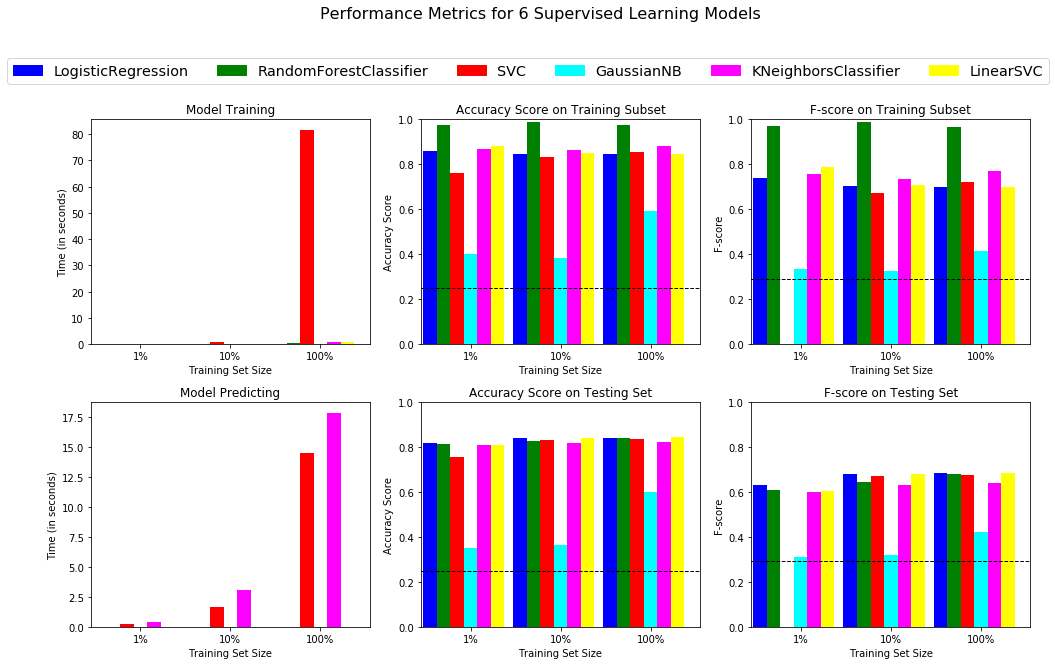

In [23]:
evaluate(results, accuracy, fscore)

**Among all the models I chose, I would like to pick the RandomForestClassifier and LogisticRegression for optimization.**

- they both give good enough F score for the training and the testing set.
- Time for training and predicting is relatively short (as compared to SVC and KNeighborsClassifier)
- RandomForestClassifier has several hyperparameters to tune to improve the model.

**As expected GaussianNB did the worst, only slightly better than my worst predictor (assuming everyone makes greater than 50K, the dashed line in the figure).**

# Model Optimization

### Function to do RandomizedSearchCV on different learners

**Input**
- learner
- parameters: dictionary
- scorer : make_scorer object
- X_train
- y_train

**Output**
- result a dictionary with 
    - best_clf:best_estimator
    - accuracy_score_before: accuracy_score before tuning
    - accuracy_score after: accuracy_score after tuning
    - fscore_before: f0.5 score before tuning
    - fscore_after: f0.5 score after tuning

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import fbeta_score,accuracy_score
def random_search(learner,parameters,scorer,X_train,y_train,X_test,y_test):
    result={}
    random_obj = RandomizedSearchCV(learner, parameters, scoring=scorer,verbose=1)
    random_fit = random_obj.fit(X_train, y_train)
    best_clf = random_fit.best_estimator_
    
    # Make predictions using the unoptimized and model
    unoptimized_predictions = (learner.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)
    result['accuracy_score_before'] = accuracy_score(y_test,  unoptimized_predictions)
    result['accuracy_score after'] = accuracy_score(y_test, best_predictions)
    result['fscore_before'] = fbeta_score(y_test,  unoptimized_predictions, beta = 0.5)
    result['fscore_after'] = fbeta_score(y_test, best_predictions, beta = 0.5)
    result['best_clf'] = best_clf
     
    return result

## Perform RandomizedSearchCV for the selected learners

In [25]:
from sklearn.metrics import make_scorer
scores={}
scorer = make_scorer(fbeta_score, beta=0.5)

#define learners to tune
#RandomForest
clf_1=RandomForestClassifier(random_state=2,n_jobs=-1)
#set up parameters
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt',0.1,0.2]
max_depth = [int(x) for x in np.linspace(5, 100, num = 10)]
max_depth.append(None)
min_samples_split = [2,5,10,20]
min_samples_leaf = [2,4,8,16]

para_1={'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

#Logistic Regression
clf_2 = LogisticRegression(random_state=2,n_jobs=-1)
para_2 = {'penalty':['l1','l2'],
          'C':[0.001,0.01,0.1,1,10,100,1000]}


#pile up clf and parameters in a list
clfs=[clf_1,clf_2]
parameters=[para_1,para_2]

#loop to get the scores
for learner,parameter in zip(clfs,parameters):
    learner_name = learner.__class__.__name__
    scores[learner_name]= random_search(learner,parameter,scorer,X_train,y_train,X_test,y_test)
    

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   53.2s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   15.3s finished


In [26]:
#visualize the metrics for each model after parameter optimization
pd.DataFrame(scores)

,LogisticRegression,RandomForestClassifier
accuracy_score after,0.842012,0.861249
accuracy_score_before,0.841902,0.840464
best_clf,"LogisticRegression(C=0.1, class_weight=None, d...","(DecisionTreeClassifier(class_weight=None, cri..."
fscore_after,0.684188,0.733109
fscore_before,0.683165,0.677661


In [27]:
scores['RandomForestClassifier']['best_clf']

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=36, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=-1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

**The performance of RandomForestClassifier has improved after tuning but not LogisticRegression.**

**For RandomForestClassifier**
- My optimized model's accuracy and F-score are 0.8611 and 0.7317, respectively. 
- They are just slightly better than the unoptimized model. I think the optimized model performs better than the non-optimized model becuase it has the n_estimators of 64 compared to 10 for the non-optimized model. More trees built for voting makes a more robust model prediction. 


## Feature Reduction



**I chose RandomForestClassifier as the optimal model so far, and I can extract feature importance from this model, why not try to reduce features? If I can reduce features to a reasonable number, maybe I can try to improve by using some more time-consuming models.**

In [28]:
#extract the feature importances out from the best_estimator
best_clf=scores['RandomForestClassifier']['best_clf'] 
importances =best_clf.feature_importances_
std=np.std([tree.feature_importances_ for tree in best_clf],axis=0)

#get index of features sorted by importances value
indices=np.argsort(importances)[::-1]


### Function to plot feature importance weight
**Input**
- columns: a list of column(feature) names
- value: a list of values of importances
- n: number of features should equal to the len(columns)
- std: a list of std of the top n features

**Plot a bar plot**

In [29]:
def feature_plot(columns,values,n,std):
    fig = plt.figure(figsize = (10,8))
    plt.bar(np.arange(n), values, width = 0.3,yerr=std,align="center", color = '#00A000', \
              label = "Feature Weight")
    plt.bar(np.arange(n) + 0.3, np.cumsum(values), width = 0.3, align = "center", color = '#00A0A0', \
              label = "Cumulative Feature Weight")
    plt.xticks(np.arange(n)+0.15, columns,rotation=60,fontsize=8,fontweight='bold')
    plt.xlim((-0.5, n))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)

    plt.title("Normalized Weights for First {} Most Predictive Features".format(n), fontsize = 16)    
    plt.legend(loc = 'upper left')
    plt.tight_layout()
    plt.show()  

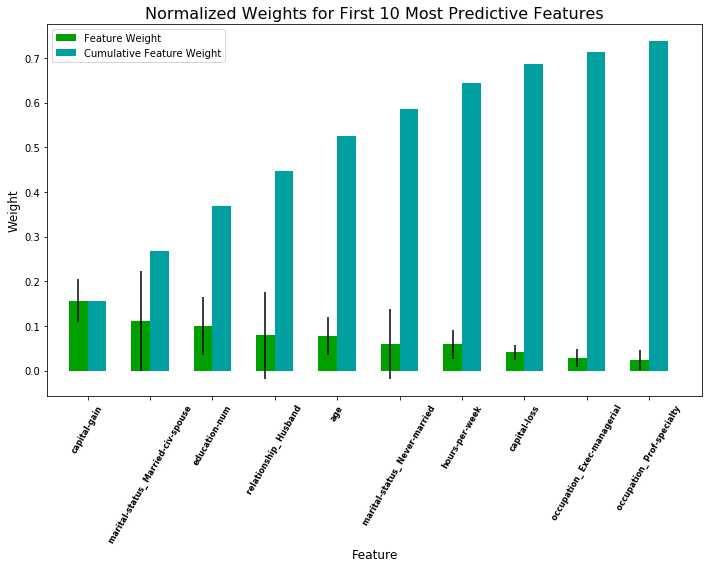

In [30]:
feature_plot(X_train.columns[indices[:10]],importances[indices[:10]],10,std[indices[:10]])

**It seems the top 10 weighted features contribute to >0.7 of the feature importance**<br />
I guessed hours-per-week, capital-gain, education-num or occupation-related features would weigh more among all these features, but I did not expect age, marital-status, played such vital roles too.
But if I think about it, marital-status could reflect the stability of someone's life, thus indirectly indicate one's financial ability. Age could reveal one's experience at work, while experience is usually proportional to the salary. 
Overall, I think the feature importances make sense.

## Test models with reduced features

In [31]:
X_train_reduced = X_train[X_train.columns[indices[:10]]]
X_test_reduced = X_test[X_test.columns[indices[:10]]]

#confirm success
print('Now the shape of X_train is {}'.format(X_train_reduced.shape))
print('Now the shape of X_test is {}'.format(X_test_reduced.shape))


Now the shape of X_train is (36177, 10)
Now the shape of X_test is (9045, 10)


In [32]:
# first test on the optimized_best model(RandomForest) to evaluate the performances
from sklearn.base import clone
clf_reduced = (clone(best_clf)).fit(X_train_reduced, y_train)
# Make new predictions
reduced_predictions = clf_reduced.predict(X_test_reduced)

print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(scores['RandomForestClassifier']['accuracy_score after']))
print("F-score on testing data: {:.4f}".format(scores['RandomForestClassifier']['fscore_after']))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8612
F-score on testing data: 0.7331

Final Model trained on reduced data
------
Accuracy on testing data: 0.8563
F-score on testing data: 0.7192


**It seems reducing features from 103 to 10 does not affect the optimized RandomForestClassifier that much. I would use the reduced training set if more data is coming for this model.**

**When I did the initial evaluation of models, SVC and K-Nearest Neighbors (KNeighbors) gave a decent performance score but were time-costing.Therefore I did not further optimize these two models. Now I would like to try to use these two models on the data set with reduced feature to see if I can reduce the time for training and predicting so I can further optimize these models.**

### Use the reduced set to evaluate the performances of SVC and K-Nearest Neighbors

**Non-optimized RandomForestClassifier is used as a control for the time for training and predicting**

In [33]:
clf_B = RandomForestClassifier()
clf_C = SVC()
clf_E = KNeighborsClassifier()

# Calculate the number of samples for 1%, 10%, and 100% of the training data

samples_100 = len(y_train)
samples_10 = int(0.1*len(y_train))
samples_1 = int(0.01*len(y_train))

# Collect results on the learners
results_reduced = {}
for clf in [clf_B,clf_C,clf_E]:
    clf_name ='Reduced_'+ clf.__class__.__name__
    results_reduced[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results_reduced[clf_name][i] = \
        train_predict(clf, samples, X_train_reduced, y_train, X_test_reduced, y_test)


RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.


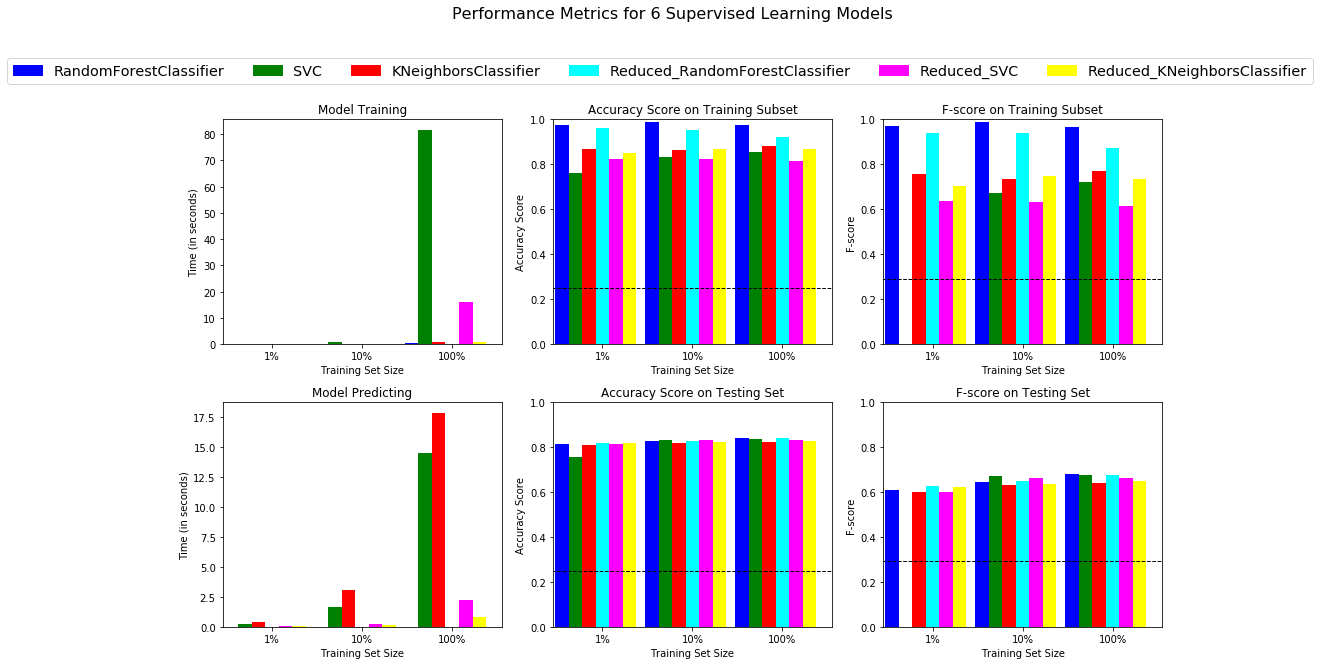

In [34]:
#unreduced_results for RandomForestClassifier, SVC and KNeightborsClassifier
unreduced_results = {'RandomForestClassifier': results['RandomForestClassifier'],
                     'SVC':results['SVC'],
                    'KNeighborsClassifier':results['KNeighborsClassifier']}
#combine the unreduced and the reduced results
unreduced_results.update(results_reduced)

evaluate(unreduced_results,accuracy, fscore)

**Feature reduction leads to a decrease in the time for training and predicting models for both SVC and KNeighborsClassifier, while the performance metrics have not changed that much.**

**So I decide to further optimize SVC and KNeighborsClassifier.**

In [36]:
#define learners to tune SVC and KNeighbors with reduced data_set

#append onto the scores
clf_SVC=SVC(random_state=6)
#set up parameters

para_SVC={'kernel': ['poly',"rbf"],
        'C': [0.001,0.01,0.1,1,10,100,1000],
        'gamma':[0.001,0.1,0.1,10,100,1000],
        'degree':[2,3,4,5,6]}

#KN 
clf_KN = KNeighborsClassifier(n_jobs=-1)

#pick odd number from 1-49
para_KN = {'n_neighbors':[i for i in range(50) if i%2!=0]}


#pile up clf and parameters in a list
clfs=[clf_SVC,clf_KN]
parameters=[para_SVC,para_KN]

#loop to get the scores
for learner,parameter in zip(clfs,parameters):
    learner_name = 'Reduced_'+learner.__class__.__name__
    scores[learner_name]= random_search(learner,parameter,scorer,X_train_reduced,y_train,X_test_reduced,y_test)
    

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  7.2min finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.2min finished


In [37]:
pd.DataFrame(scores)

,LogisticRegression,RandomForestClassifier,Reduced_KNeighborsClassifier,Reduced_SVC
accuracy_score after,0.842012,0.861249,0.839469,0.849309
accuracy_score_before,0.841902,0.840464,0.827418,0.832062
best_clf,"LogisticRegression(C=0.1, class_weight=None, d...","(DecisionTreeClassifier(class_weight=None, cri...","KNeighborsClassifier(algorithm='auto', leaf_si...","SVC(C=1, cache_size=200, class_weight=None, co..."
fscore_after,0.684188,0.733109,0.67749,0.704658
fscore_before,0.683165,0.677661,0.64801,0.66241


# Summary

**After optimization, the F-score for SVC (with reduced training set) has increased from 0.6624 to 0.7046, while the F-score for KNeighborsClassifier    (with reduced training set) has risen from 0.64801 to 0.67749. Nevertheless, none of these performed as well as RandomForestClassifier (F-score 0.7331 with full data set, 0.7192 with the reduced dataset). Also, RandomForestClassifier takes the least time to train and to predict. Therefore, I would pick the RandomForestClassifier.**